In [1]:
## DATA SCRAPPING AND ANALYSIS
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as soup
import requests
import matplotlib.pyplot as plt

In [2]:
#Step 1
#Getting the URL and accessing the page
url = 'https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'
req = requests.get(url)
page_soup = soup(req.text, "html.parser")
print(page_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script charset="utf-8" src="//web-static.archive.org/_static/js/bundle-playback.js?v=6XRi73ky" type="text/javascript">
  </script>
  <script charset="utf-8" src="//web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" type="text/javascript">
  </script>
  <script>
   window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};
  </script>
  <script src="//web-static.archive.org/_static/js/ruffle.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html","20201112015618","https://web.archive.org/","web","//web-static.archive.org/_static/",
	      "1605146178");
  </script>
  <link href="//web-static.archive.org/_static/css/banner-styles.css?v=S1zqJCYt" rel="stylesheet" type="text/css"/>
  <link href="//web-static.archive.org/_static/css/ic

In [3]:
#Getting the table from the web page and getting all the table data
table = page_soup.findAll("table", {"class": "table table-striped table-responsive-md"})
rows = table[0].findAll("tr", {"style": ""})

del rows[0]
all_data = []
for row in rows:
  columns1=row.findAll('td')
  solarflare=[column.getText(strip=True) for column in columns1]
  all_data.append(solarflare)

#renaming the columns in the table
columns1 = ["Rank","x_class", "Date", "Region", "Start_time", "Max_time", "End_time", "Movie"]
#print(all_data)
df = pd.DataFrame(all_data,columns=columns1)
#print(df)
df


,Rank,x_class,Date,Region,Start_time,Max_time,End_time,Movie
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


In [4]:
# Step 2:
# Dropping the last column as it is not required
df=df.drop(columns=["Movie"])
#print(df)
df

,Rank,x_class,Date,Region,Start_time,Max_time,End_time
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,0486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,0930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39


In [5]:
# Merging the Date and start_time, max_time and end_time columns
for index,row in df.iterrows():
  date1=pd.to_datetime(row['Date']+' '+row['Start_time'],format='%Y/%m/%d %H:%M:%S')
  df.at[index,'Start_datetime']=date1
  date2=pd.to_datetime(row['Date']+' '+row['Max_time'],format='%Y/%m/%d %H:%M:%S')
  df.at[index,'Max_datetime']=date2
  date3=pd.to_datetime(row['Date']+' '+row['End_time'],format='%Y/%m/%d %H:%M:%S')
  df.at[index,'End_datetime']=date3

# Dropping the unwanted columns
df=df.drop(columns=["Start_time"])
df=df.drop(columns=["Max_time"])
df=df.drop(columns=["End_time"])
df=df.drop(columns=["Date"])
#print(df)

# Renaming the new columns with new names
new_column = ["Rank","x_class", "Start_datetime", "Max_datetime", "End_datetime","Region"]
df=df[new_column]
#print(df)

# Replacing the missing columns values with NaN
df=df.replace(to_replace="-",value="NaN")
#print(df)
df

,Rank,x_class,Start_datetime,Max_datetime,End_datetime,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


In [6]:
# Step 3:
#Scrapping the NASA data. Getting the Web page URL and text from the page
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
req = requests.get(url)
page_soup = soup(req.text, "html.parser")
print(page_soup.prettify())


<html>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <br/>
  <h4 style="padding-bottom=0px">
   Relevant Publication:
  </h4>
  Gopalswamy, N., Mäkelä, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111,
  <a href="https://doi.org/10.31401/SunGeo.2019.02.03">
   DOI:10.31401/SunGeo.2019.02.03
  </a>
  <br/>
  <br/>
  <pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (

In [7]:
# Extract the text from the first pre element
tables = page_soup.find("pre")
table_text = tables.get_text()

# Split the text into lines
rows = table_text.split('\n')

row_data = []
for row in rows[12: ]:
  if row.strip():
    row_data.append(row.split())

# Concatenate each row of data into a single string
for i in range(0, len(row_data)):
  if len(row_data[i]) > 15:
    row_data[i][15] = ' '.join(row_data[i][15: ])
    del row_data[i][16:]
del row_data[-1]

# Separate each line of text into a data row
col=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location',
    'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed',
    'plots','Others']

# Create a DataFrame to store the data
nasa_df = pd.DataFrame(row_data, columns = col)
nasa_df


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots,Others
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,None
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,None
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,None
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,None
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385,PHTX,STEREO A data
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001,PHTX,"STEREO A data, faint in WIND"
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX,None
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077,----,None


In [8]:
# Step 4: Tidy the NASA table

# Finding all missing records and replacing with NaN
nasa_df = nasa_df.replace('---', np.nan)
nasa_df = nasa_df.replace('----', np.nan)
nasa_df = nasa_df.replace('-----', np.nan)
nasa_df = nasa_df.replace('------', np.nan)
nasa_df = nasa_df.replace('--/--', np.nan)
nasa_df = nasa_df.replace('--:--', np.nan)
nasa_df = nasa_df.replace('????', np.nan)

# Creating new column to record to cme_angle = Halo/Not Halo
nasa_df['is_halo'] = np.where(nasa_df['cme_angle'] == 'Halo', True, False)

# Replacing the cme_angle column with NaN for Halo entries
nasa_df['cme_angle'] = nasa_df['cme_angle'].replace('Halo', 'NaN')

# Creating a new column for lower bound
nasa_df['width_lower_bound'] = nasa_df['cme_width'].str.startswith('>')
nasa_df['cme_width'] = nasa_df['cme_width'].str.replace('>', '').str.replace('[^0-9]' ,'', regex = True)
nasa_df


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots,Others,is_halo,width_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,None,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,None,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,None,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,None,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,NaN,NaN,09/17,12:00,NaN,360,1385,PHTX,STEREO A data,True,False
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,PHTX,"STEREO A data, faint in WIND",False,False
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX,None,False,False
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,NaN,M4.4,11/29,13:25,NaN,360,2077,NaN,None,True,False


In [9]:
nasa_df['cme_width'].unique()

array(['79', '360', '165', '155', '109', '122', '91', '73', '84', '190',
       '178', '301', '139', '268', '177', '281', '59', '169', '160', '19',
       '196', '150', '181', '154', '184', '245', '175', '125', '87', '98',
       '129', '76', '118', '108', '90', '105', '170', '104', '116', '133',
       '198', '289', '101', '229', '70', nan, '50', '148', '176', '81',
       '48', '60', '66', '80', '244', '292', '89', '205', '167', '132',
       '216', '119', '207', '130', '68', '166', '138', '121', '212',
       '211', '56', '120', '159', '199', '99', '186', '161', '228', '188',
       '236', '162', '38', '64', '141', '264', '282', '93', '272', '267',
       '209', '171', '239', '111', '65', '103', '217', '242', '197',
       '182', '92', '314', '136', '179', '273', '100', '146', '214',
       '140', '51', '208', '55', '106', '164', '112', '43', '276', '158',
       '261', '237', '193', '173', '94', '157', '243', '250', '263', '83',
       '189', '156', '26', '223', '96', '254', '252',

In [10]:
# Combining date and time columns for start, end and cme
nasa_df['start_datetime'] = pd.to_datetime(nasa_df['start_date'] + ' ' + nasa_df['start_time'], format='%Y/%m/%d %H:%M')

nasa_df['end_time'] = nasa_df['end_time'].replace("24:00", "00:00")

nasa_df['Year'] = pd.to_datetime(nasa_df['start_date']).dt.year
nasa_df['end_datetime'] = pd.to_datetime(nasa_df['Year'].astype(str) + '/' + nasa_df['end_date'] + ' ' + nasa_df['end_time'], format = '%Y/%m/%d %H:%M')
nasa_df['cme_datetime'] = pd.to_datetime(nasa_df['Year'].astype(str) + '/' + nasa_df['cme_date'] + ' ' + nasa_df['cme_time'], format = '%Y/%m/%d %H:%M')

# removing the old columns
nasa_df = nasa_df.drop(columns = 'start_date')
nasa_df = nasa_df.drop(columns = 'start_time')
nasa_df = nasa_df.drop(columns = 'end_date')
nasa_df = nasa_df.drop(columns = 'end_time')
nasa_df = nasa_df.drop(columns = 'cme_date')
nasa_df = nasa_df.drop(columns = 'cme_time')

table_columns = ['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed', 'plots', 'is_halo', 'width_lower_bound','Others']
nasa_df = nasa_df[table_columns]
nasa_df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound,Others
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,None
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,None
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,None
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,None
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360,1385,PHTX,True,False,STEREO A data
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,2017-10-18 08:00:00,85,146,1001,PHTX,False,False,"STEREO A data, faint in WIND"
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,PHTX,False,False,None
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,NaN,M4.4,2020-11-29 13:25:00,NaN,360,2077,NaN,True,False,None


In [11]:
# Checking the columns and datatypes
data_types_dict = {'start_frequency' : float, 'end_frequency': float, 'cme_width' : float, 'cme_speed' : float}
nasa_df = nasa_df.astype(data_types_dict)
nasa_df.dtypes

start_datetime          datetime64[ns]
end_datetime            datetime64[ns]
start_frequency                float64
end_frequency                  float64
flare_location                  object
flare_region                    object
flare_classification            object
cme_datetime            datetime64[ns]
cme_angle                       object
cme_width                      float64
cme_speed                      float64
plots                           object
is_halo                           bool
width_lower_bound               object
Others                          object
dtype: object

In [12]:
# Replication

# Getting the top 50 Solar flares from NASA table
nasa_df = nasa_df.sort_values(by = 'flare_classification', ascending = False)

top_50_sf_data = nasa_df.head(50)
top_50_sf_data


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound,Others
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,PHTX,True,False,None
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,PHTX,True,False,None
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,NaN,LASCO_DATA_GAP
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360.0,2598.0,PHTX,True,False,None
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,PHTX,True,False,onset has WAVES Data Gap
288,2005-01-20 07:15:00,2005-01-20 16:30:00,14000.0,25.0,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360.0,882.0,PHTX,True,False,None
359,2011-08-09 08:20:00,2011-08-09 08:35:00,16000.0,4000.0,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360.0,1610.0,PHTX,True,False,None
331,2006-12-06 19:00:00,2006-12-08 00:00:00,16000.0,30.0,S05E64,10930,X6.5,NaT,NaN,NaN,NaN,PHTX,False,NaN,LASCO_DATA_GAP
317,2005-09-09 19:45:00,2005-09-09 22:00:00,10000.0,50.0,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360.0,2257.0,PHTX,True,False,None
82,2000-07-14 10:30:00,2000-07-15 14:30:00,14000.0,80.0,N22W07,9077,X5.7,2000-07-14 10:54:00,NaN,360.0,1674.0,PHTX,True,False,None


In [13]:
# comparing solar flare table with NASA table
compare = df[df['x_class'].isin(nasa_df['flare_classification'])]
compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 6 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Rank            39 non-null     object        
 1   x_class         39 non-null     object        
 2   Start_datetime  39 non-null     datetime64[ns]
 3   Max_datetime    39 non-null     datetime64[ns]
 4   End_datetime    39 non-null     datetime64[ns]
 5   Region          39 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.1+ KB


In [14]:
# comparing NASA table with solar flare table
compare1 = nasa_df[nasa_df['flare_classification'].isin(df['x_class'])]
compare1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 8 to 9
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_datetime        29 non-null     datetime64[ns]
 1   end_datetime          29 non-null     datetime64[ns]
 2   start_frequency       29 non-null     float64       
 3   end_frequency         29 non-null     float64       
 4   flare_location        29 non-null     object        
 5   flare_region          28 non-null     object        
 6   flare_classification  29 non-null     object        
 7   cme_datetime          28 non-null     datetime64[ns]
 8   cme_angle             28 non-null     object        
 9   cme_width             28 non-null     float64       
 10  cme_speed             28 non-null     float64       
 11  plots                 29 non-null     object        
 12  is_halo               29 non-null     bool          
 13  width_lower_bound     2

I tried to replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA but the data was not same. So only few columns were replicated.


Based on their classification, the top 50 solar flares from the NASA table, and data from the solar flare events are not same. Not all data have the same features.

In [15]:
# Question 2: Integration
# creating a new function to find best match
def matches(df, nasa_df):
    best_matches = []

    for i, sl_row in df.iterrows():
        nasa_df['time_difference'] = abs(nasa_df['start_datetime'] - sl_row['start_datetime'])
        best_match = nasa_df.loc[nasa_df['time_difference'].idxmin()]
        best_matches.append(best_match)
    return pd.DataFrame(best_matches)

# Finding the best match
match_df = matches(top_50_sf_data, nasa_df)

# Adding a new column for rank
df_rank = nasa_df.copy()
df_rank['SpaceWeatherLive_rank'] = np.nan

for idx, match_row in match_df.iterrows():
    df_rank.loc[match_row.name, 'SpaceWeatherLive_rank'] = idx + 1

print(df_rank[['start_datetime', 'end_datetime', 'SpaceWeatherLive_rank']])


         start_datetime        end_datetime  SpaceWeatherLive_rank
8   1997-11-06 12:20:00 1997-11-07 08:30:00                    9.0
514 2017-09-06 12:05:00 2017-09-07 08:00:00                  515.0
328 2006-12-05 10:50:00 2006-12-05 20:00:00                  329.0
237 2003-11-02 17:30:00 2003-11-03 01:00:00                  238.0
515 2017-09-10 16:02:00 2017-09-11 06:50:00                  516.0
..                  ...                 ...                    ...
509 2016-08-15 18:21:00 2016-08-15 18:28:00                    NaN
510 2017-04-23 06:00:00 2017-04-23 06:13:00                    NaN
512 2017-07-23 05:27:00 2017-07-23 06:12:00                    NaN
517 2017-09-17 11:45:00 2017-09-17 12:35:00                    NaN
518 2017-10-18 05:48:00 2017-10-18 12:40:00                    NaN

[522 rows x 3 columns]




I used the Start_datetime as the criteria while selecting the rows that most closely matched the NASA and SpaceWeatherLive datasets in order to rank the the realtion and find the best matches.

I defined a function called matches and used the start_datetime as the criteria to find the best match.


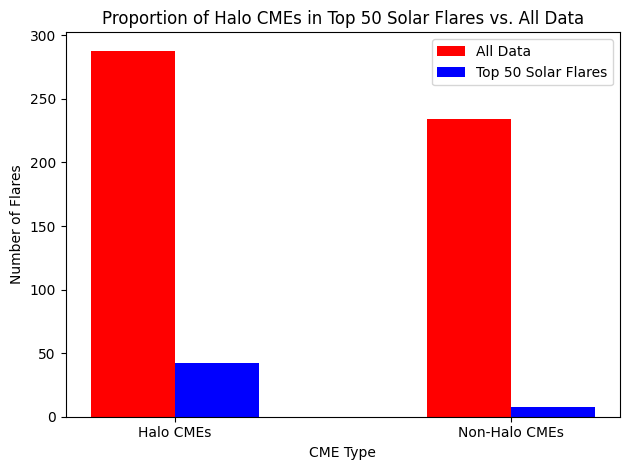

In [16]:
# Analysis

# checking entire dataset
halo_cmes = df_rank['is_halo'].sum()
non_halo_cmes = len(df_rank) - halo_cmes
proportion_all_data = [halo_cmes, non_halo_cmes]

# checking top 50 flares
top_50_halo_cmes = top_50_sf_data['is_halo'].sum()
top_50_non_halo_cmes = len(top_50_sf_data) - top_50_halo_cmes
proportion_top_50 = [top_50_halo_cmes, top_50_non_halo_cmes]

# Bar plot
categories = ['Halo CMEs', 'Non-Halo CMEs']
bar_width = 0.25
index = range(len(categories))

plt.bar(index, proportion_all_data, bar_width, label='All Data', color='red')
plt.bar([i + bar_width for i in index], proportion_top_50, bar_width, label='Top 50 Solar Flares', color='blue')

plt.xlabel('CME Type')
plt.ylabel('Number of Flares')
plt.title('Proportion of Halo CMEs in Top 50 Solar Flares vs. All Data')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()

plt.tight_layout()
plt.show()


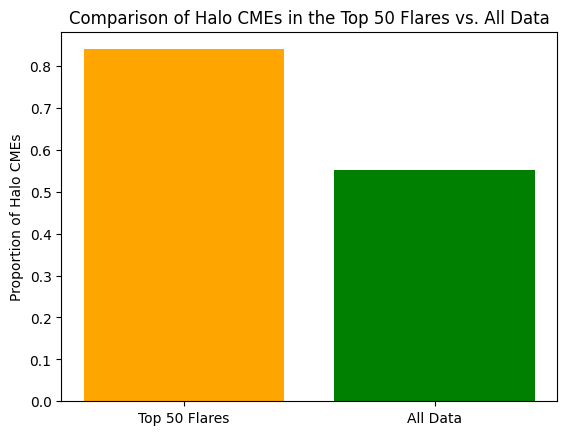

In [17]:
# plotting the graph
top_50_halo = top_50_sf_data['is_halo'].sum()
total_halo = nasa_df['is_halo'].sum()
proportion_top_50 = top_50_halo / len(top_50_sf_data)
proportion_whole_dataset = total_halo / len(nasa_df)
labels = ['Top 50 Flares', 'All Data']
values = [proportion_top_50, proportion_whole_dataset]

# Bar plot
plt.bar(labels, values, color=['orange', 'green'])
plt.ylabel('Proportion of Halo CMEs')
plt.title('Comparison of Halo CMEs in the Top 50 Flares vs. All Data')
plt.show()